# Animation of linear fit
Original code from https://towardsdatascience.com/gradient-descent-animation-1-simple-linear-regression-e49315b24672

Animations are saved into animGif files. Generating the animations may take few minutes.

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera


# Simple linear regression model:
class LinearRegression1(object):
    def __init__(self,w=1,b=1, lr=0.01): 
        self.lr=lr
        self.w=np.array([[w]])
        self.b=np.array([b])

    def cost(self,x,y):     
        pred = x@self.w+self.b  # predicted y-values
        e=y-pred             # error term
        return np.mean(e**2)  # mean squared error

    def fit(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        dJ_dw=(np.mean(e*(-2*x), axis=0)) # partial derivate of J with respect to w
        dJ_db=(np.mean(e*(-2),axis=0)) # partial derivate of J with respect to b
        self.w = (self.w.T-self.lr*dJ_dw).T  # update w
        self.b = self.b - self.lr*dJ_db    # update b

    def predict(self, x):
        return (x @ self.w.T + self.b)  # return predicted values

    def params(self):
        return (self.w,self.b)   # return parameters

In [32]:
# Introduce training data
x_train = np.array([     
    [1],
    [2],
    [4],
    [5],
    [6],
    [7]
])

y_train0 = np.array([     
    [4],
    [-12],
    [3],
    [-11],
    [-5],
    [-17]
])

y_train = np.array([     
    [2],
    [-7],
    [-1.5],
    [-9.5],
    [-7.5],
    [-14.5]
])

#y_train =  -2*x_train + 2 + np.reshape(2*np.random.randn(len(x_train)),[len(x_train),1])


# Introduce lists where data points are being stored: 
w_list=[]   # list contains weights
b_list=[]   # list contains biases
c_list=[]   # list contains costs 
ys_list=[]  # store arrays of predicted y-values for xs ( -> plot regression line!) 
cl_list = [] # list contains predicted y-values for x_train ( -> plot connecting lines!) 

xs= np.array([    # set x-values for regression line plot               
            [-3],
             [10]
             ])

# Train model: 
model=LinearRegression1(w=3,b=-1,lr=0.001) # set initial parameters and learning rate 

for i in range(60000):      # set number of epochs
    w_list.append(model.params()[0])    # append weights (=slopes) to list
    b_list.append(model.params()[1])    # append biases (=y-intercepts) to list
    c_list.append(model.cost(x_train,y_train))  # append costs to list
    ys_list.append(model.predict(xs).T)     # append pairs of predicted y-values for xs 
    cl_list.append(model.predict(x_train).T) # append predicted y-values for x_train to list
    model.fit(x_train, y_train) # fit model


# print parameters and costs after all epochs
print("weight: " + str( model.params()[0]) )  
print("y-intercept: " + str( model.params()[1]) )
print("costs: "+ str(model.cost(x_train, y_train)))

weight: [[-2.]]
y-intercept: [2.]
costs: 10.666666666666664


In [33]:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-2.]]
[2.]


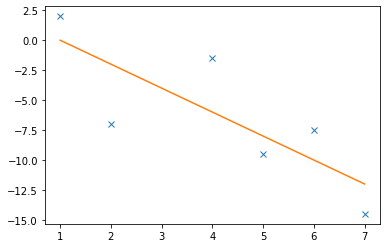

In [34]:
plt.plot(x_train,y_train,'x')
plt.plot(x_train,reg.coef_*x_train+reg.intercept_)

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

<ipython-input-10-bfe4c3b6303e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(3, 2, 2)
<ipython-input-10-bfe4c3b6303e>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis.
<ipython-input-10-bfe4c3b6303e>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

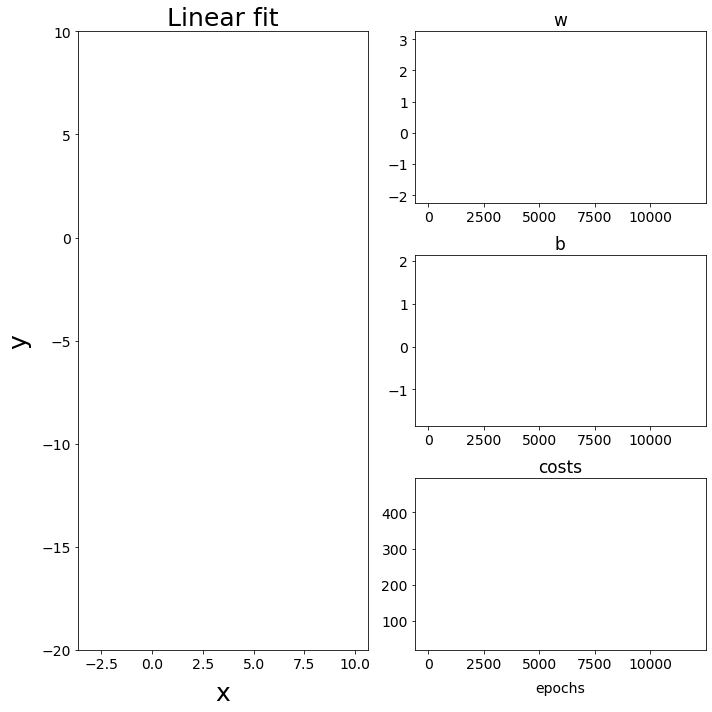

In [10]:
# Define which epochs/data points to plot
a=np.arange(0,50,1).tolist()
b=np.arange(50,100,5).tolist()
c=np.arange(100,12000,200).tolist()
p = a+b+c # points we want to plot

# Turn lists into arrays
w= np.array(w_list).flatten()
b= np.array(b_list).flatten()
c= np.array(c_list).flatten()
ys = np.array(ys_list) 
p=np.array(p)

# Create first animation: 
fig = plt.figure(figsize=(10,10)) # create figure
labelsize_ = 14
camera = Camera(fig)  # create camera
for i in p:
    ax1=fig.add_subplot(3, 2, 2)  
    ax1.plot(w[0:i], color='blue', linestyle="dashed", alpha=0.5)
    ax1.set_title("w", fontsize=17)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(3, 2, 4, sharex=ax1) # right plots share x-axis. 
    ax2.plot(b[0:i], color='red', linestyle="dashed", alpha=0.5)
    ax2.set_title("b", fontsize=17)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax3=fig.add_subplot(3, 2, 6, sharex=ax1) 
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_title("costs", fontsize=17)
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=14, labelpad=10)

    ax0=fig.add_subplot(1, 2, 1) # plot fit
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(),
                 color='r', label=str(i))  # set legend; flatten arrays to get plots!
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])

    plt.tight_layout()
    camera.snap() # take snapshot after each frame/iteration
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500) # create animation 
animation.save('SimpleLinReg_1.gif', writer = 'imagemagick') # save animation 

In [11]:
# Print final parameters and costs portrayed in animations 
print("Slope: " + str(w[i])) 
print("y-intercept: " + str(b[i])) 
print("final costs: " + str(c[i]))

Slope: -1.9933280497098227
y-intercept: 1.9653553483257509
final costs: 42.6669125993761


<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=fig.add_subplot(2, 2, 4, sharey=ax1)
<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instanc

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

<ipython-input-12-a53b77148185>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0=fig.add_subplot(2, 1, 1)
<ipython-input-12-a53b77148185>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=fig.add_subplot(2, 2, 3)
<ipython-input-12-a53b77148185>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

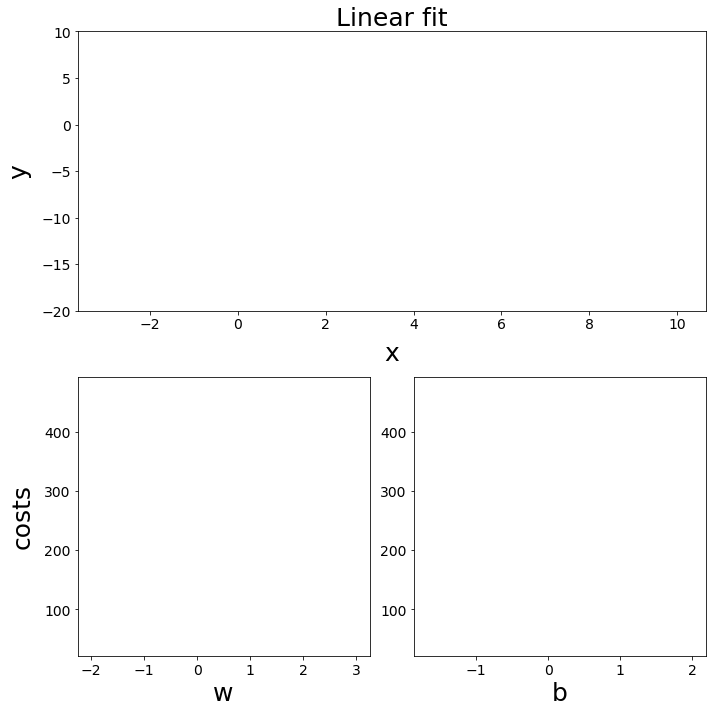

In [12]:
# Second animation
fig = plt.figure(figsize=(10,10))
camera = Camera(fig)

for i in p: # use the same points to plot as before 
    ax0=fig.add_subplot(2, 1, 1) 
    leg=ax0.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))
    ax0.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax0.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i],
               linestyle="dashed",color='r',alpha=0.3)    # plot connecting lines
    ax0.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15)
    ax0.set_title("Linear fit", fontsize=25)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax0.set_xlabel("x", fontsize=25, labelpad=10)
    ax0.set_ylabel("y", fontsize=25, labelpad=10)
    ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
    ax0.set_ylim([-20, 10])
    
    ax1=fig.add_subplot(2, 2, 3) 
    ax1.plot(w[i], c[i], marker='x', markersize=13, color="orangered")
    ax1.plot(np.array(w_list).flatten(),np.array(c_list).flatten() ,
             linestyle='dashed', color="blue")
    ax1.set_xlabel("w", fontsize=25)
    ax1.set_ylabel("costs", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=labelsize_)

    ax2=fig.add_subplot(2, 2, 4, sharey=ax1) 
    ax2.plot(b[i], c[i], marker='x', markersize=13, color="orangered")
    ax2.plot(np.array(b_list).flatten(),np.array(c_list).flatten() ,
             linestyle='dashed', color="red")
    ax2.set_xlabel("b", fontsize=25)
    ax2.tick_params(axis='both', which='major', labelsize=labelsize_)
    
    plt.tight_layout()
    camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500)
animation.save('SimpleLinReg_2.gif', writer = 'imagemagick')

In [13]:
def cost_3d(x,y,w,b):  # predicts costs for every pair of w and b. 
        pred = x@w.T+b                       
        e=y-pred
        return np.mean(e**2)
        
ws = np.linspace(-5, 5.0, 10) # set range of values for w and b for surface plot
bs = np.linspace(-5, 5, 10)
M, B = np.meshgrid(ws, bs) # create meshgrid

zs = np.array([cost_3d(x_train,y_train,       # determine costs for each pair of w and b 
        np.array([[wp]]), np.array([[bp]]))  # cost_3d() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

<ipython-input-43-ff1d3b6125e9>:43: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax3.plot(c[0:i],color='black',linestyle="dashed")
<ipython-input-43-ff1d3b6125e9>:44: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax3.set_xscale('log')
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


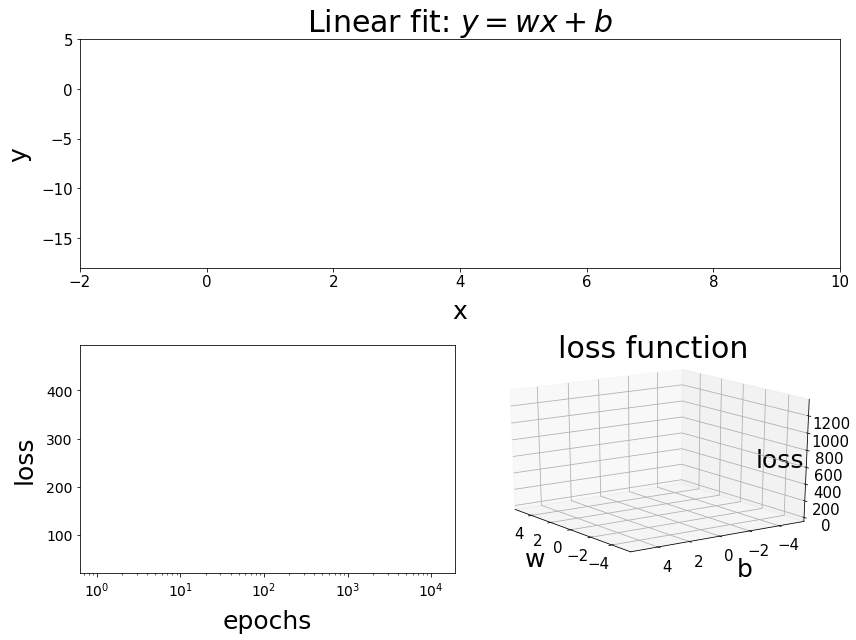

In [43]:
# Third Animation
fig = plt.figure(figsize=(12,9))  
ax1=fig.add_subplot(211)
ax1.set_title("Linear fit: $y = w x + b$", fontsize=30 )
ax2 = fig.add_subplot(224, projection='3d') # projection='3d'
ax2.set_title("loss function", fontsize=30)
ax2.view_init(elev=20., azim=145)           # set view
ax3=fig.add_subplot(2, 2, 3)
camera = Camera(fig)

for i in p:       
    leg=ax1.plot(xs.T.flatten(),ys[i].flatten(), color='r', label=str(i))  
    ax1.vlines(x_train.T, ymin=y_train.T, ymax=cl_list[i], linestyle="dashed",
               color='r',alpha=0.3)
    ax1.scatter(x_train, y_train, color='b',marker='x', s=44)
    ax1.legend(leg,[f'epochs: {i}'], loc='upper right', fontsize=15) 
    ax1.set_xlabel("x", fontsize=25, labelpad=10)
    ax1.set_ylabel("y", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=15) 
    #ax1.set_ylim([-20, 10])
    ax1.set_ylim([-18, 5])
    ax1.set_xlim([-2, 10])
    
    ax2.plot_surface(M, B, Z, rstride=1, cstride=1, color='b',
                     alpha=0.35) # create surface plot
    ax2.scatter(w[i],b[i],c[i],marker='o', s=12**2, color='orange' )
    ax2.set_xlabel("w", fontsize=25, labelpad=10)
    ax2.set_ylabel("b", fontsize=25, labelpad=10)
    ax2.set_zlabel("loss", fontsize=25,
    labelpad=-35) # negative value for labelpad places z-label left of z-axis.
    ax2.tick_params(axis='both', which='major', labelsize=15) 
    ax2.plot(w[0:i],b[0:i],c[0:i], linestyle="dashed",linewidth=2,
             color="grey") # (dashed) lineplot
    
     
    #ax3.plot(b[i], w[i], marker='x', markersize=13, color="orangered")
    #ax3.plot(np.array(b_list).flatten(),np.array(w_list).flatten() ,
    #         linestyle='dashed', color="red")
    #ax3.set_xlabel("b", fontsize=25)
    #ax3.set_ylabel("w", fontsize=25)
    #ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    
    ax3.plot(c[0:i],color='black',linestyle="dashed")
    ax3.set_xscale('log')
    ax3.tick_params(axis='both', which='major', labelsize=labelsize_)
    ax3.set_xlabel("epochs", fontsize=25, labelpad=10)
    ax3.set_ylabel("loss", fontsize=25, labelpad=10)
    
    plt.tight_layout()
    camera.snap()
    
animation = camera.animate(interval = 5,
                          repeat = False, repeat_delay = 500)
animation.save('SimpleLinReg_3.gif', writer = 'imagemagick')
